## Breast Histopathology Images

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4977982/

The original dataset contained 162 whole mount slide images of breast cancer (BCa) (invasive ductal carcinomas (IDCs)) specimens scanned at a magnification of 40x. From these images, a total of 277,524 patches sized 50 x 50 pixels were extracted, comprising 198,738 IDC-negative patches and 78,786 IDC-positive patches. Each patch is named using the format: u_xX_yY_classC.png — for example, 10253_idx5_x1351_y1101_class0.png. In this naming convention, "u" represents the patient ID (10253_idx5), "X" is the x-coordinate from which the patch was cropped, "Y" is the y-coordinate, and "C" denotes the class, with 0 indicating non-IDC and 1 indicating IDC. Data availability https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data


0 indicating non-IDC 

1 indicating IDC

Breast cancer is one of the most common cancers worldwide. It is the most frequently diagnosed cancer among women, accounting for a significant percentage of cancer cases globally. According to the World Health Organization (WHO), breast cancer ranks as the leading cause of cancer-related deaths among women. While it primarily affects women, it can also occur in men, albeit at a much lower rate. The high prevalence of breast cancer has led to increased awareness, research, and advancements in early detection and treatment, making it a significant focus in oncology.

In [13]:
# Downloading the data from kaggle and unziping it
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp /Users/monicapitu/Downloads/kaggle.json /Users/monicapitu/.kaggle/kaggle.json
# !chmod 600 /Users/monicapitu/.kaggle/kaggle.json
# !Kaggle datasets list -s 'breast histopathology images'
# !kaggle datasets download -d 'paultimothymooney/breast-histopathology-images'
# !unzip breast-histopathology-images.zip -d data/

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)


In [3]:
# Libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split


### **Load and Explore the Dataset**

In [5]:
# Accessing the data contained in multiple folders
images = glob.glob('/Users/monicapitu/Documents/DSI/team_project/data/IDC_regular_ps50_idx5/**/*.png', recursive = True)

print(images[0])


/Users/monicapitu/Documents/DSI/team_project/data/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1051_y2401_class0.png


In [6]:

print(len(images))

277524


In [7]:
# creating a data frame with data path and target column 
IDC_BRCA_df = pd.DataFrame(index = np.arange(0,len(images)),columns = ["path","target"])

for i in range (0,len(images)):
    IDC_BRCA_df.iloc[i]["path"] = images[i]
    IDC_BRCA_df.iloc[i]["target"] = int(images[i][-5])
    
IDC_BRCA_df.head()

/var/folders/vv/zp256rc15hq6l07zf7nxx4jr0000gn/T/ipykernel_25112/136444272.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  IDC_BRCA_df.iloc[i]["path"] = images[i]
/var/folders/vv/zp256rc15hq6l07zf7nxx4jr0000gn/T/ipykernel_25112/136444272

,path,target
0,/Users/monicapitu/Documents/DSI/team_project/d...,0
1,/Users/monicapitu/Documents/DSI/team_project/d...,0
2,/Users/monicapitu/Documents/DSI/team_project/d...,0
3,/Users/monicapitu/Documents/DSI/team_project/d...,0
4,/Users/monicapitu/Documents/DSI/team_project/d...,0


In [8]:
# Count the number of IDC and non_IDC cases where target equals 1
num_idc_cases = IDC_BRCA_df[IDC_BRCA_df['target'] == 1].shape[0]
num_nonidc_cases = IDC_BRCA_df[IDC_BRCA_df['target'] == 0].shape[0]
# Print the number of IDC and non_IDC cases
print(f'Number of IDC cases: {num_idc_cases}')
print(f'Number of non_IDC cases: {num_nonidc_cases}')


Number of IDC cases: 78786
Number of non_IDC cases: 198738


In [9]:
IDC_BRCA_df.shape

(277524, 2)

### **Visualizing some of the IDC positive and negative cases**

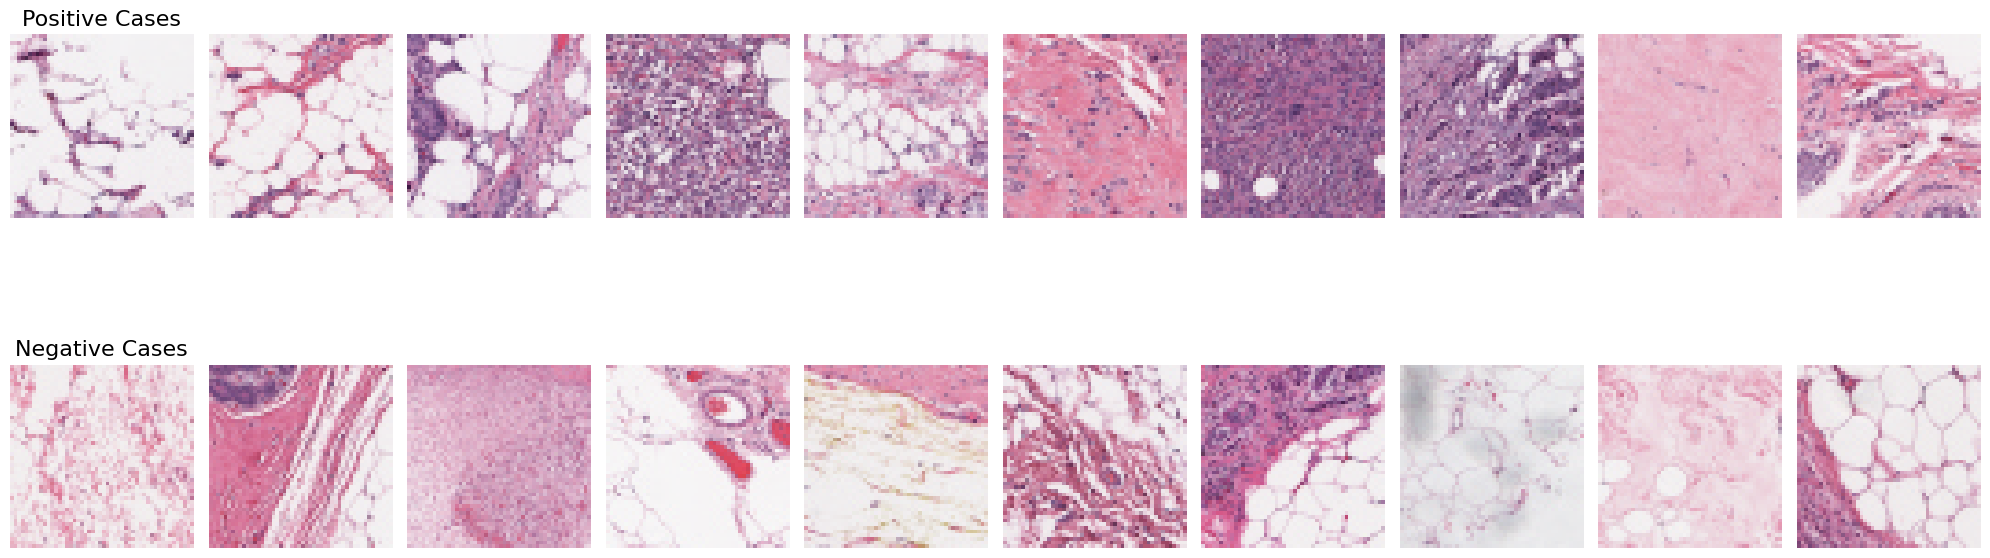

In [10]:
# Create a figure with one row and two columns for positive and negative cases
fig, ax = plt.subplots(2, 10, figsize=(20, 8))  # 2 rows, 10 columns

# Sample 10 positive cases
IDC = np.random.choice(IDC_BRCA_df[IDC_BRCA_df.target == 1].index.values, size=10, replace=False)

# Sample 10 negative cases
non_IDC = np.random.choice(IDC_BRCA_df[IDC_BRCA_df.target == 0].index.values, size=10, replace=False)

# Display positive cases in the left panel
for j in range(10):  # 10 images in total
    idx = IDC[j]  # Get the index for the image
    image = mpimg.imread(IDC_BRCA_df.loc[idx, "path"])  # Read the image from the DataFrame
    ax[0, j].imshow(image)  # Display image in the left panel
    ax[0, j].axis('off')  # Hide axes for better presentation

# Set title for the left panel
ax[0, 0].set_title("Positive Cases", fontsize=16)

# Display negative cases in the right panel
for j in range(10):  # 10 images in total
    idx = non_IDC[j]  # Get the index for the image
    image = mpimg.imread(IDC_BRCA_df.loc[idx, "path"])  # Read the image from the DataFrame
    ax[1, j].imshow(image)  # Display image in the right panel
    ax[1, j].axis('off')  # Hide axes for better presentation

# Set title for the right panel
ax[1, 0].set_title("Negative Cases", fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the figure


### **Data Preprocessing**

In [11]:
# shuffle data
all_images = IDC_BRCA_df.values
np.random.shuffle(all_images)

# Use a list comprehension to read and resize images
X = []
y = []

for f, l in all_images:
    image = cv2.imread(f, cv2.IMREAD_COLOR)  # Read the image
    if image is not None:  # Check if the image was read successfully
        image = cv2.resize(image, (50, 50), interpolation=cv2.INTER_LINEAR)  # Resize
        X.append(image)  # Append image to list
        y.append(l)  # Append label to list

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

In [21]:
# Shuffle the data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

# Print the sizes of the datasets
print(f'Train set size: {X_train.shape[0]} images')
print(f'Validation set size: {X_val.shape[0]} images')
print(f'Test set size: {X_test.shape[0]} images')


Train set size: 177615 images
Validation set size: 44404 images
Test set size: 55505 images


In [22]:
# Normalization
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### **Building a CNN Model**

In [18]:
from keras.models import Sequential  # Import Sequential model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # Import necessary layers Dropout, Input, BatchNormalization
from keras.optimizers import Adam  # Import optimizer 
from sklearn.metrics import classification_report
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix


In [23]:
# Setting up the layers
model = Sequential()  # Create a Sequential model

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))  # Input shape defined here
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Print the model summary to verify the architecture
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### **Training the model**

In [25]:
# Training the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32)

Epoch 1/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.8101 - loss: 0.4290 - val_accuracy: 0.8388 - val_loss: 0.3688
Epoch 2/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 87s 16ms/step - accuracy: 0.8441 - loss: 0.3641 - val_accuracy: 0.8549 - val_loss: 0.3423
Epoch 3/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 87s 16ms/step - accuracy: 0.8537 - loss: 0.3424 - val_accuracy: 0.8598 - val_loss: 0.3256
Epoch 4/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 87s 16ms/step - accuracy: 0.8593 - loss: 0.3320 - val_accuracy: 0.8651 - val_loss: 0.3269
Epoch 5/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 88s 16ms/step - accuracy: 0.8620 - loss: 0.3234 - val_accuracy: 0.8685 - val_loss: 0.3108
Epoch 6/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 88s 16ms/step - accuracy: 0.8648 - loss: 0.3174 - val_accuracy: 0.8655 - val_loss: 0.3167
Epoch 7/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 88s 16ms/step - accuracy: 0.8677 - loss: 0.3111 - val_accuracy: 0.8657 - val_loss: 0.3216
Epoch 8/20
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 253s 46ms/step - accuracy: 0.8698 

#### Visualizing Training History

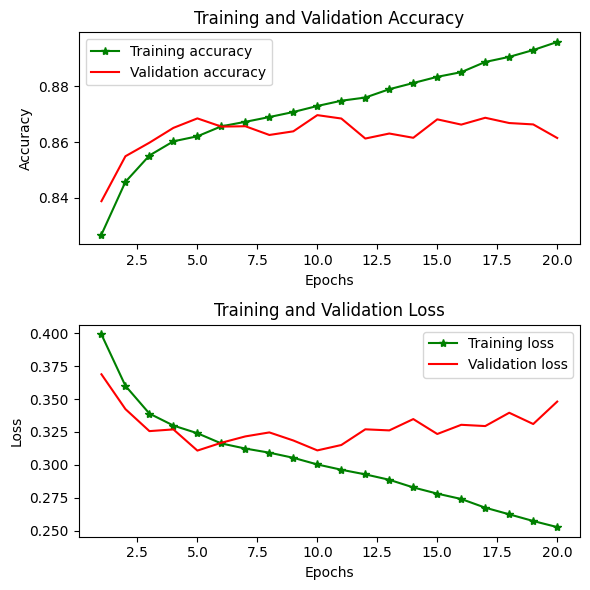

In [26]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot training and validation accuracy
ax1.plot(epochs, acc, 'g*-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Validation accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, loss, 'g*-', label='Training loss')
ax2.plot(epochs, val_loss, 'r-', label='Validation loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

### **Evaluating the Model**

In [27]:

# Optionally, evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.2f}')


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8594 - loss: 0.3544
Test Loss: 0.3540
Test accuracy: 0.86


### **Making Predictions**

In [28]:
# Making predictions on the test set
predictions = model.predict(X_test)

1735/1735 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


#### Visualizing predictions

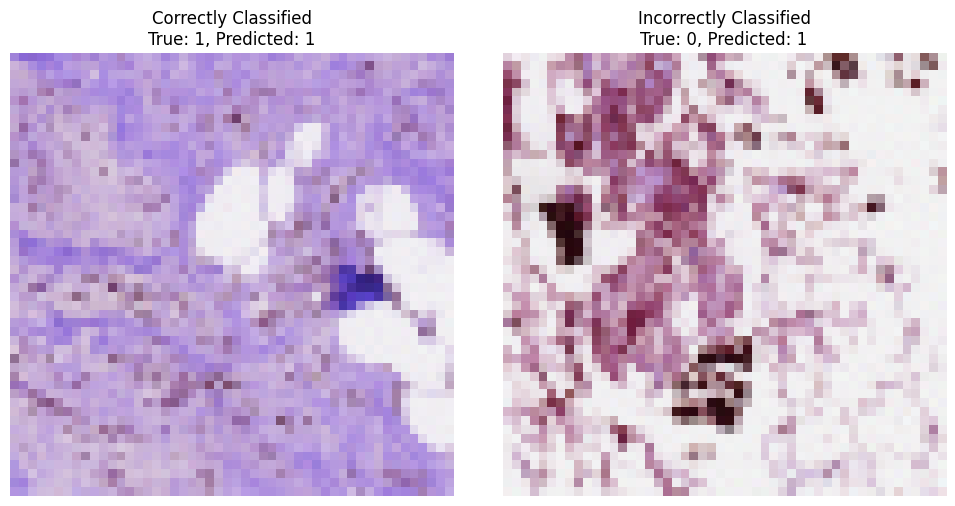

In [32]:
# Convert predictions to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Thresholding at 0.5 for binary classification
true_classes = y_test.flatten()  # Flatten to get true labels

# Identify indices of correctly classified and incorrectly classified images
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select one correctly classified image
if len(correct_indices) > 0:
    correct_index = correct_indices[0]  # Get the first correctly classified image
    correct_image = X_test[correct_index]
    correct_prediction = predicted_classes[correct_index]
    true_label_correct = true_classes[correct_index]
else:
    print("No correctly classified images found.")

# Select one incorrectly classified image
if len(incorrect_indices) > 0:
    incorrect_index = incorrect_indices[0]  # Get the first incorrectly classified image
    incorrect_image = X_test[incorrect_index]
    incorrect_prediction = predicted_classes[incorrect_index]
    true_label_incorrect = true_classes[incorrect_index]
else:
    print("No incorrectly classified images found.")

# Plotting the images if they exist
plt.figure(figsize=(10, 5))

# Correctly classified image
if len(correct_indices) > 0:
    plt.subplot(1, 2, 1)
    plt.imshow(correct_image)
    plt.title(f"Correctly Classified\nTrue: {true_label_correct}, Predicted: {correct_prediction}")
    plt.axis('off')

# Incorrectly classified image
if len(incorrect_indices) > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(incorrect_image)
    plt.title(f"Incorrectly Classified\nTrue: {true_label_incorrect}, Predicted: {incorrect_prediction}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Saving the Model**

In [ ]:
# You typically save a model after training it, ensuring you can reuse it later without retraining.
model.save('IDC_cancer_model.h5')